# Проверка стационарности ряда

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Среднемесячное количество пятен на солнце в зависимости от времени.

In [2]:
ss_df = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_applied_tasks/main/datasets/sunspots.csv', decimal='.', parse_dates=['Date'], dayfirst=False, index_col='Date')
ss_df = ss_df[[ss_df.columns[1]]]
ss_df.tail(10)

,Monthly Mean Total Sunspot Number
Date,
2020-04-30,5.2
2020-05-31,0.2
2020-06-30,5.8
2020-07-31,6.1
2020-08-31,7.5
2020-09-30,0.6
2020-10-31,14.4
2020-11-30,34.0
2020-12-31,21.8


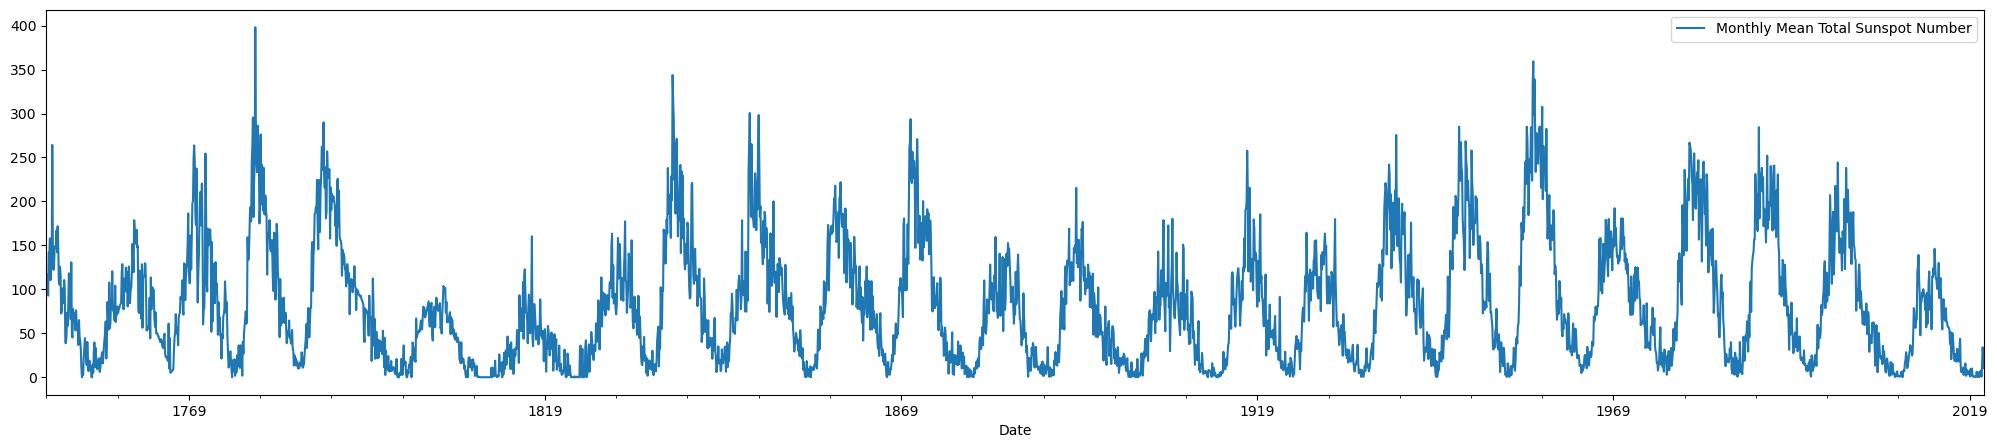

In [3]:
ss_df.plot(figsize = (25,5));

Мы видим в ряде выраженную компоненту сезонности. Значит, он нестационарный.

Проверим это при помощи теста Дики-Фуллера.

## Важно, но сложно

*На самом деле тест Дики-Фуллера не дает гарантии стационарности ряда. Как же так?*

Тест Дики-Фуллера проверяет нулевую гипотезу
**H0:** есть единичный корень (что гарантирует нестационарность ряда)

Но альтернативная гипотеза
**H_A:** нет единичного корня - не гарантирует, что ряд стационарен!

In [4]:
from statsmodels.tsa import stattools

df_stat = stattools.adfuller(ss_df[-1500:])

print('The Augmented Dickey-Fuller test statistic %f, \npvalue: %.2f\ncritical values: %s' %
      (df_stat[0], df_stat[1], df_stat[4]))

if df_stat[0] > df_stat[4]['5%']:
    print('Есть единичные корни - ряд нестационарный')
else:
    print('Единичных корней нет (возможно, ряд стационарен)')

The Augmented Dickey-Fuller test statistic -6.714526, 
pvalue: 0.00
critical values: {'1%': -3.434791163965702, '5%': -2.8635014840083945, '10%': -2.5678142741740877}
Единичных корней нет (возможно, ряд стационарен)


Тест Дики-Фуллера привел нас к неверному результату!

Существуют и другие тесты для проверки наличия у ряда единичного корня. А есть тесты, которые напрямую проверяют стационарность ряда.

Например, широко применяется тест KPSS (Kwiatkowski–Phillips–Schmidt–Shin test). Он проверяет нулевую гипотезу

**H_0:** ряд стационарен

In [5]:
from statsmodels.tsa.stattools import kpss

kpss_stat = stattools.kpss(ss_df[-1000:])
print('The KPSS test statistic %f, \npvalue: %.3f \ntable distribution: %s' %
      (kpss_stat[0], kpss_stat[1], kpss_stat[3]))

if kpss_stat[0] > kpss_stat[3]['5%']:
    print('Отвергаем H0, значит, ряд нестационарный')
else:
    print('Ряд стационарный')

The KPSS test statistic 0.468615, 
pvalue: 0.049 
table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Отвергаем H0, значит, ряд нестационарный


Интересное обсуждение множества различных тестов на наличие единичного корня и стационарность есть [здесь](https://stats.stackexchange.com/questions/30569/what-is-the-difference-between-a-stationary-test-and-a-unit-root-test/235916#235916)